# Written map task: analysis

Juan Berrios | juanberrios@pitt.edu | Last updated: February 28, 2023

**Summary and overview of the data:**

- The purpose of this project is to do an analysis of the results of a map task being piloted for a study on code-switching. This pilot was conducted using only one language, either English or Spanish. In this second notebook I keep processing the data and extracting relevant features using NLP techniques. I finish with a descriptive analysis.

**Contents:**

1. [Preparations](#1.-Preparations): includes the necessary preparations, including importing libraries and loading files.
2. [Extracting information](#2.-Extracting-information): extracting the features of interest using NLTK.
3. [Descriptive analysis](#3.-Descriptive-analysis): a description of results as tallied by language, session, and participant.
4. [Summary](#4.-Summary): a summary of the results with a focus on linguistic features.

## 1. Preparations

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import pickle, nltk
import os
from matplotlib import pyplot as plt
import seaborn as sns

#seaborn settings
sns.set(font_scale=2)
sns.set_style("whitegrid")

#Releasing all output:                                            
from IPython.core.interactiveshell import InteractiveShell #Prints all commands rather than the last one.
InteractiveShell.ast_node_interactivity = "all"

#Turning pretty print off:
%pprint

Pretty printing has been turned OFF


In [2]:
#Loading files

df = pd.read_excel('./spreadsheets/df.xlsx')
df.shape

(2525, 6)

In [3]:
#Remove incomplete sessions (two and fifteen)

df = df.loc[df['session'] != 'two']
df = df.loc[df['session'] != 'fifteen']
df.reset_index(drop=True, inplace=True) #resetting index
df.shape

(2223, 6)

In [4]:
df.to_excel("./spreadsheets/df_edited.xlsx", index=False) #Saving as spreadsheet file
df.to_pickle('./pkl/df_edited.pkl')                       #Pickling

## 2. Extracting information

In [49]:
#Current nuber of sessions

len(set(df['session']))

20

In [50]:
#A reminder of what the data look like

df.head(10) 

,turn,time,participant,language,session,date
0,Start behind the surfer with the board overhead,9:48:23 pm,A1,English,one,07/06/2021
1,Curve around the surfer’s feet,9:48:23 pm,A1,English,one,07/06/2021
2,"Then go towards the water at a slight angle, e...",9:48:23 pm,A1,English,one,07/06/2021
3,Should I stop at the waters edge?,9:50:02 pm,B1,English,one,07/06/2021
4,Nope,9:50:09 pm,A1,English,one,07/06/2021
5,Slight curve to the blue water. At the level o...,9:50:09 pm,A1,English,one,07/06/2021
6,"Yinz got it, neat?",9:51:14 pm,A1,English,one,07/06/2021
7,*n’at,9:51:14 pm,A1,English,one,07/06/2021
8,Reddy for the next steps n’at?,9:51:14 pm,A1,English,one,07/06/2021
9,I'm in front of the pink dolphin,9:51:38 pm,B1,English,one,07/06/2021


In [51]:
df['turn'].iloc[0] #What the very first turn looks like. 

'Start behind the surfer with the board overhead'

- To start operations on the whole data frame let's first lowercase the turn column (where necessary): 

In [52]:
df['turn'] = df['turn'].map(lambda x: x.lower())

In [53]:
df['turn'].sample(10) #Sample. Looks good

1006                                let do the second pic
1116    start on bottom right side underneath dog to t...
866          y te metes por entre el arbusto y el cierto,
1023                                got in the blue part?
1458          down through the log where the goldfish are
1908                                                  sip
2213                                                hecho
1681    bueno despues de la chef te iras por debajo de...
969             go right straight towards the cloths rack
1085                                       and that's all
Name: turn, dtype: object

- Now tokenizing: 

In [54]:
toks = df['turn'].map(nltk.word_tokenize) 

In [55]:
type(toks)
toks[:10] #sample

<class 'pandas.core.series.Series'>

0    [start, behind, the, surfer, with, the, board,...
1             [curve, around, the, surfer, ’, s, feet]
2    [then, go, towards, the, water, at, a, slight,...
3          [should, i, stop, at, the, waters, edge, ?]
4                                               [nope]
5    [slight, curve, to, the, blue, water, ., at, t...
6                          [yinz, got, it, ,, neat, ?]
7                                        [*, n, ’, at]
8          [reddy, for, the, next, steps, n, ’, at, ?]
9           [i, 'm, in, front, of, the, pink, dolphin]
Name: turn, dtype: object

In [56]:
df['tokens'] = toks #Might come back and examine if a by-language tokenizing is necessary, right now it doesn't appear 
                    #to be so

In [57]:
df[["turn", "tokens"]].sample(10) #A sample. Now that I'm just seeing the columns of interest. Looks good.

,turn,tokens
184,ok done,"[ok, done]"
2029,lol what,"[lol, what]"
436,lmk when you're reconnected with this plane of...,"[lmk, when, you, 're, reconnected, with, this,..."
2193,siguiente mapa,"[siguiente, mapa]"
1735,cuál es la pregunta,"[cuál, es, la, pregunta]"
837,ahora pasa por entre e pozo y la guitarra,"[ahora, pasa, por, entre, e, pozo, y, la, guit..."
715,sales de la esquina superior izquierda,"[sales, de, la, esquina, superior, izquierda]"
686,hecho.,"[hecho, .]"
165,equidistant?,"[equidistant, ?]"
866,"y te metes por entre el arbusto y el cierto,","[y, te, metes, por, entre, el, arbusto, y, el,..."


In [58]:
df['token_count'] = df['tokens'].map(len) #Number of tokens per turn

In [59]:
df[["turn", "tokens", "token_count"]].sample(10) #A sample. 

,turn,tokens,token_count
458,okay ready for the scarier park,"[okay, ready, for, the, scarier, park]",6
1483,sigue hacia la doctora y la bordea por la part...,"[sigue, hacia, la, doctora, y, la, bordea, por...",11
28,in between ball and sandcastle,"[in, between, ball, and, sandcastle]",5
2083,k,[k],1
1278,done,[done],1
100,go north in straight line and stop at the brid...,"[go, north, in, straight, line, and, stop, at,...",11
1094,ok,[ok],1
2081,k,[k],1
1832,rodea la tienda de campa;a,"[rodea, la, tienda, de, campa, ;, a]",7
909,got lost?,"[got, lost, ?]",3


In [60]:
df['type_count'] = df['tokens'].apply(lambda x: len(set(x))) #Number of types per turn

In [61]:
df[["turn", "tokens", "type_count"]].sample(10) #A sample. 

,turn,tokens,type_count
1638,te ubiucas?,"[te, ubiucas, ?]",3
120,go north east to just above the flame,"[go, north, east, to, just, above, the, flame]",8
1533,no entre la casa y el hospital,"[no, entre, la, casa, y, el, hospital]",7
454,that's it,"[that, 's, it]",3
1851,ya,[ya],1
1309,you will pass underneath the canoe,"[you, will, pass, underneath, the, canoe]",6
699,y vas a cruzar a la siguiente isla en diagonal...,"[y, vas, a, cruzar, a, la, siguiente, isla, en...",17
1198,ooo thanks for the tip,"[ooo, thanks, for, the, tip]",5
1377,and slightly above the firepit,"[and, slightly, above, the, firepit]",5
314,and smaller cacti to its se,"[and, smaller, cacti, to, its, se]",6


- Lastly frequency distributions for each row:

In [62]:
df['freq_dist'] = df.tokens.map(nltk.FreqDist) 

In [63]:
df[["turn", "tokens", "freq_dist"]].sample(10) #A sample. 

,turn,tokens,freq_dist
640,siguiendo con nuestra imagen mental de la serp...,"[siguiendo, con, nuestra, imagen, mental, de, ...","{'siguiendo': 1, 'con': 1, 'nuestra': 1, 'imag..."
625,de allí subes para pasar por el estrecho que c...,"[de, allí, subes, para, pasar, por, el, estrec...","{'de': 2, 'allí': 1, 'subes': 1, 'para': 1, 'p..."
2096,k,[k],{'k': 1}
977,then go up north the picture and stop at the e...,"[then, go, up, north, the, picture, and, stop,...","{'then': 1, 'go': 1, 'up': 1, 'north': 1, 'the..."
1963,"once you go between the tent and speaker, ligh...","[once, you, go, between, the, tent, and, speak...","{'once': 1, 'you': 1, 'go': 1, 'between': 1, '..."
178,near something?,"[near, something, ?]","{'near': 1, 'something': 1, '?': 1}"
1150,"sweet okay and then do like a ""c"" motion going...","[sweet, okay, and, then, do, like, a, ``, c, '...","{'sweet': 1, 'okay': 1, 'and': 2, 'then': 2, '..."
1860,"ok, ahora pasa entre el fuego y el frontal de ...","[ok, ,, ahora, pasa, entre, el, fuego, y, el, ...","{'ok': 1, ',': 1, 'ahora': 1, 'pasa': 1, 'entr..."
1087,"start at the upper left of the map, above and ...","[start, at, the, upper, left, of, the, map, ,,...","{'start': 1, 'at': 1, 'the': 4, 'upper': 1, 'l..."
1111,ok,[ok],{'ok': 1}


- Saving results:

In [64]:
df.to_excel("./spreadsheets/df_analysis.xlsx", index=False) #Saving as spreadsheet file
df.to_pickle('./pkl/df_analysis.pkl')                       #Pickling

## 3. Descriptive analysis

- Let's start with overall counts:

In [65]:
df.describe() #Continuous variables

,token_count,type_count
count,2223.000000,2223.000000
mean,8.730994,7.618983
std,8.798145,6.766196
min,1.000000,1.000000
25%,2.000000,2.000000
50%,6.000000,6.000000
75%,12.000000,11.000000
max,103.000000,57.000000


- Zooming in on figures of interest:

In [66]:
#Total 

print('Total turns:\n', len(df))
print('Total tokens:\n', np.sum(df['token_count']))
print('Total types:\n', np.sum(df['type_count']), '\n')


#Means and SDs

print('Mean tokens per turn:\n', np.mean(df['token_count']))
print('Standard deviation:\n', np.std(df['token_count']), '\n')
print('Mean types per turn:\n', np.mean(df['type_count']))
print('Standard deviation:\n', np.std(df['type_count']))

Total turns:
 2223
Total tokens:
 19409
Total types:
 16937 

Mean tokens per turn:
 8.730994152046783
Standard deviation:
 8.796165649916274 

Mean types per turn:
 7.618983355825461
Standard deviation:
 6.7646736227881075


- By participant:

Turns by participant:
Total:


E1    111
S1    105
A1    102
B2    100
G2    100
N2     95
M2     95
T1     79
H2     77
N1     74
K2     72
M1     71
B1     70
P1     65
J2     65
X1     62
F1     62
A2     61
I2     58
W1     56
L2     52
Q1     49
K1     45
O1     41
R1     39
L1     37
I1     35
H1     34
O2     33
V1     33
Y1     30
G1     30
U1     27
R2     26
Z1     26
F2     24
E2     24
J1     22
P2     18
Q2     18
Name: participant, dtype: int64

Relative:


E1    0.049933
S1    0.047233
A1    0.045884
B2    0.044984
G2    0.044984
N2    0.042735
M2    0.042735
T1    0.035538
H2    0.034638
N1    0.033288
K2    0.032389
M1    0.031939
B1    0.031489
P1    0.029240
J2    0.029240
X1    0.027890
F1    0.027890
A2    0.027440
I2    0.026091
W1    0.025191
L2    0.023392
Q1    0.022042
K1    0.020243
O1    0.018444
R1    0.017544
L1    0.016644
I1    0.015744
H1    0.015295
O2    0.014845
V1    0.014845
Y1    0.013495
G1    0.013495
U1    0.012146
R2    0.011696
Z1    0.011696
F2    0.010796
E2    0.010796
J1    0.009897
P2    0.008097
Q2    0.008097
Name: participant, dtype: float64

Mean turns by participant:


55.575

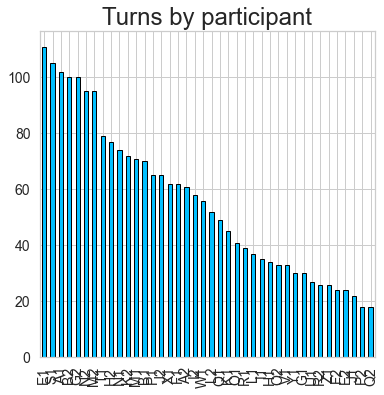

In [67]:
print('Turns by participant:')
print('Total:')
df['participant'].value_counts()
print('Relative:')
df['participant'].value_counts(normalize=True)
print('Mean turns by participant:')
np.mean(df['participant'].value_counts())
df['participant'].value_counts().plot(kind='bar', figsize=(6,6), color=['deepskyblue'], edgecolor="black", fontsize=14, 
                                      title ='Turns by participant')

In [68]:
print('Mean tokens and types each turn by participant:')
df.groupby(['participant']).mean()

Mean tokens and types each turn by participant:


,token_count,type_count
participant,,
A1,8.205882,7.627451
A2,6.360656,5.754098
B1,5.342857,5.157143
B2,7.870000,7.250000
E1,8.747748,7.900901
E2,10.416667,9.083333
F1,9.774194,8.193548
F2,8.958333,8.166667
G1,8.200000,7.000000


- By language:

In [69]:
print('Turns by language:')            #Note that there are more ENG sessions, and that the first ENG 
print('Total:')                        #session included all 8 maps
df['language'].value_counts()          
print('Relative:')
df['language'].value_counts(normalize=True)

Turns by language:
Total:


English    1317
Spanish     906
Name: language, dtype: int64

Relative:


English    0.592443
Spanish    0.407557
Name: language, dtype: float64

Mean tokens and types by language:


,token_count,type_count
language,,
English,8.807897,7.599848
Spanish,8.619205,7.646799


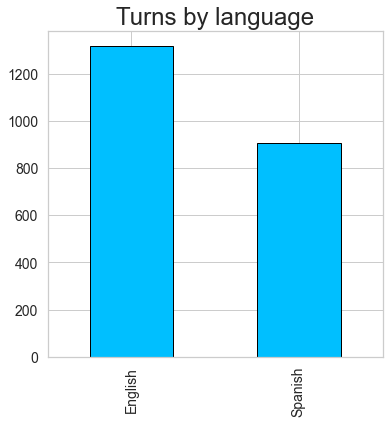

In [70]:
print('Mean tokens and types by language:')
df.groupby(['language']).mean()
df['language'].value_counts().plot(kind='bar', figsize=(6,6), color=['deepskyblue'], edgecolor="black", fontsize=14, 
                                      title ='Turns by language')

Text(15.795000000000002, 0.5, 'Tokens per turn')

Text(0.5, 21.92, 'Language')

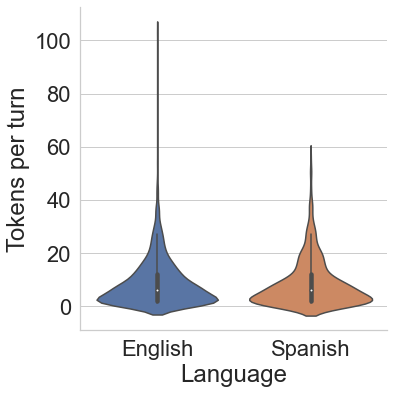

In [71]:
p = sns.catplot(x="language", y="token_count", kind="violin",data=df, height=6, aspect=1)
plt.ylabel('Tokens per turn')
plt.xlabel('Language')

- By session:

Turns by session:
Total:


twenty        190
ten           184
seventeen     177
three         173
one           172
fourteen      161
seven         145
nineteen      124
eighteen      123
twelve        118
eight         106
nine           88
six            82
four           64
eleven         60
five           57
thirteen       56
twenty-one     51
sixteen        48
twenty-two     44
Name: session, dtype: int64

Relative:


twenty        0.085470
ten           0.082771
seventeen     0.079622
three         0.077823
one           0.077373
fourteen      0.072425
seven         0.065227
nineteen      0.055780
eighteen      0.055331
twelve        0.053081
eight         0.047683
nine          0.039586
six           0.036887
four          0.028790
eleven        0.026991
five          0.025641
thirteen      0.025191
twenty-one    0.022942
sixteen       0.021592
twenty-two    0.019793
Name: session, dtype: float64

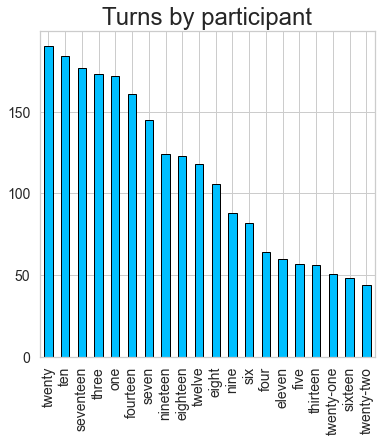

In [72]:
print('Turns by session:')
print('Total:')
df['session'].value_counts()
df['session'].value_counts().plot(kind='bar', figsize=(6,6), color=['deepskyblue'], edgecolor="black", fontsize=14, 
                                      title ='Turns by participant')
print('Relative:')
df['session'].value_counts(normalize=True)

In [73]:
print('Mean tokens and types by session:')
df.groupby(['session']).mean()

Mean tokens and types by session:


,token_count,type_count
session,,
eight,9.028302,8.160377
eighteen,6.146341,5.626016
eleven,11.050000,8.700000
five,15.017544,11.877193
four,6.625000,5.796875
fourteen,7.298137,6.683230
nine,9.113636,8.147727
nineteen,9.443548,8.298387
one,7.040698,6.622093


- I'll finish with frequency distributions (for the full dataset). To get total numbers for the whole data frame we need to unnest (flatten) the `tokens` series. For this purpose we can use Panda's own "explode" function. This must also be done by language:

In [74]:
#Creating subsets for language

eng = df[df.language == "English"]
spa = df[df.language == "Spanish"]

eng.shape
spa.shape

(1317, 10)

(906, 10)

In [75]:
#Unnesting the tokens column

unnested_eng = eng['tokens'].explode()
unnested_spa = spa['tokens'].explode()

In [76]:
#Creating frequency distributions

eng_fd = nltk.FreqDist(unnested_eng)
spa_fd = nltk.FreqDist(unnested_spa)

In [77]:
print('Top 25 words - English')
eng_fd.most_common(25)
print('Top 25 words - Spanish')
spa_fd.most_common(25)

Top 25 words - English


[('the', 1452), ('and', 368), ('of', 333), ('to', 273), (',', 234), ('go', 186), ('you', 172), ('right', 170), ('left', 149), ('on', 147), ('then', 139), ('in', 134), ('a', 128), ('i', 128), ('?', 122), ('at', 115), ('between', 100), ('it', 100), ('ok', 90), ('line', 84), ('down', 82), ('top', 80), ("'s", 79), ('above', 76), ('up', 75)]

Top 25 words - Spanish


[('la', 492), ('de', 328), ('el', 315), ('y', 290), ('por', 249), (',', 221), ('a', 200), ('del', 172), ('?', 135), ('al', 115), ('que', 112), ('en', 101), ('hasta', 100), ('ok', 96), ('entre', 83), ('las', 79), ('vas', 67), ('encima', 63), ('sin', 63), ('los', 58), ('.', 57), ('un', 53), ('lado', 48), ('luego', 46), ('hacia', 45)]

- Without stop words and punctuation:

In [78]:
#Using nltk's lists for both languages

from nltk.corpus import stopwords 
eng_stop = stopwords.words('english')
spa_stop = stopwords.words('spanish')

In [79]:
#English

eng_nosym = [x for x in unnested_eng if x.isalnum()] # removing punctuation
eng_nostop =  [x for x in eng_nosym if x not in eng_stop] #stop words

#Spanish

spa_nosym = [x for x in unnested_spa if x.isalnum()] # removing punctuation
spa_nostop =  [x for x in spa_nosym if x not in spa_stop] #stop words

In [80]:
#Creating new frequency distributions

eng_nostop_fd = nltk.FreqDist(eng_nostop)
spa_nostop_fd = nltk.FreqDist(spa_nostop)

Top 25 non-stop words - English


[('go', 186), ('right', 170), ('left', 149), ('ok', 90), ('line', 84), ('top', 80), ('side', 71), ('around', 68), ('start', 64), ('head', 56), ('going', 55), ('okay', 55), ('curve', 54), ('bridge', 53), ('rock', 47), ('corner', 47), ('map', 46), ('stop', 45), ('towards', 44), ('cactus', 44), ('got', 42), ('done', 42), ('path', 41), ('bottom', 40), ('k', 39), ('draw', 38), ('end', 36), ('make', 35), ('straight', 34), ('like', 34), ('turn', 34), ('across', 33), ('tent', 33), ('south', 30), ('edge', 29), ('north', 29), ('diagonal', 28), ('toward', 28), ('tree', 27), ('cross', 27), ('water', 26), ('rocks', 26), ('dog', 25), ('pass', 25), ('continue', 25), ('one', 24), ('car', 24), ('parrot', 24), ('island', 24), ('ready', 23)]

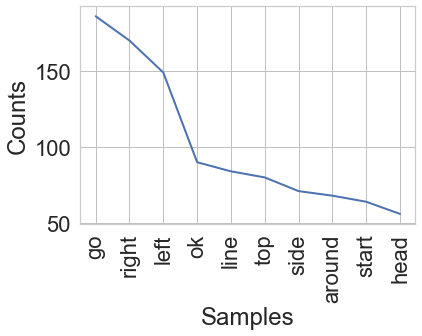

Top 25 non-stop words - Spanish


[('ok', 96), ('vas', 67), ('encima', 63), ('lado', 48), ('luego', 46), ('hacia', 45), ('listo', 42), ('debajo', 41), ('abajo', 38), ('tronco', 38), ('pasar', 36), ('izquierda', 36), ('ahora', 36), ('derecha', 35), ('perro', 34), ('parte', 34), ('tocar', 32), ('línea', 30), ('cactus', 29), ('pasas', 28), ('ahí', 26), ('puente', 26), ('justo', 25), ('camino', 25), ('bajas', 24), ('arriba', 23), ('izquierdo', 21), ('llegar', 21), ('subes', 21), ('pasando', 21), ('sigue', 21), ('pasa', 21), ('mapa', 20), ('dos', 20), ('grande', 19), ('casa', 19), ('x', 19), ('medio', 18), ('linea', 18), ('rodeas', 17), ('superior', 17), ('sigues', 17), ('rio', 17), ('tienda', 15), ('pozo', 15), ('si', 15), ('roca', 14), ('guitarra', 14), ('fuego', 14), ('carro', 14)]

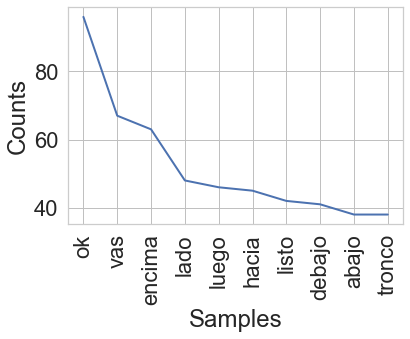

In [81]:
print('Top 25 non-stop words - English')
eng_nostop_fd.most_common(50)
eng_nostop_fd.plot(10)
print('Top 25 non-stop words - Spanish')
spa_nostop_fd.most_common(50)
spa_nostop_fd.plot(10)

In [82]:
#Cardinal points in English

"north" in eng_nostop
"south" in eng_nostop
"east" in eng_nostop
"west" in eng_nostop

#Cardinal points in Spanish

"norte" in spa_nostop
"sur" in spa_nostop
"este" in spa_nostop
"oeste" in spa_nostop

True

True

True

True

True

False

False

False

## 4. Summary

- **In general**:
    - There are 1,446 turns and 12089 tokens in total. There are 10713 types. Note that the latter figure might be inflated by typos/alternate spelling which can be removed in later processing. The difference between types and token is small as turns are normally short. When considering both languages, the mean lenght of a turn is 8.36 tokens, with a relatively high standard deviation of 7.91, although this could be skewed by abundance of short turns indicating confirmation (e.g., "ok"). 
- **Participant**:
    - Some participants were noticeably more chatty than others, other this could be affected by the maps they used, as well as their interpersonal relationship. The mean number of turns per participant was 69.94.
- **Language**:
    - The data are currently composed primarily of English session tokens so it's more appropriate to look at means. Overall it appears that Spanish turns were longer, with a mean token count og 8.90. English turns had a mean token count of 8.19. 
- **Lexis**:
    - After stripping the frequency distributions of stop words, it appears that the most commonly used words are those used to give directions. Examples from English are "go", "right", "left", and "around". Examples from Spanish are "vas", "hacia", and "encima". There are also references to elements from the maps among the most commonly used words, such as "bridge", "map", and "tree". It's also worth noting that the most common words in both languages are equivalent.